In [1]:
# Useful starting lines
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
from implementations_s import*
from cross_validation import *

In [3]:
DATA_TRAIN_PATH = '../../data/train.csv'
y, x, ids = load_csv_data(DATA_TRAIN_PATH)

### Cleaning of the dataset

In [4]:
#Feature names and their respective indices
string_features = 'DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt'
features = string_features.split(",")
dict_ = {}
for ind, feat in enumerate(features):
    dict_[feat] = ind

In [5]:
# selecting only well-defined samples
selector = np.all(x != -999.0, axis=1)
x_non_nan = x[selector]
y_non_nan = y[selector]

In [6]:
# replacing the non-defined features by the mean of the features 
x_mean_replacement = helpers.replace_mean(x)

In [7]:
# replacing the non-defined features by the mean of the features, according by the reactor
x_subgroups_list, ids_list = subgrouping(x, ids, dict_)
print(x_subgroups_list[0][0].shape)
x_subgroups = group(x_subgroups_list, ids_list, dict_)

C:\Users\User\Documents\Etudes\MA1\ML\ML_Project1\scripts\proj1_helpers.py:70: RuntimeWarning: invalid value encountered in true_divide
  x_norm[:,valid_columns] =  ( x_valid_cols - mean_x[None, :] ) / std_x[None, :]


(29,)


In [8]:
# only taking well-defined features
# careful can output some nan values depending on the kept features
x_selected_features = select_non_nan_columns(x)

In [9]:
# combining subroups and not seclecting all features
x_selected_features_subgoups = select_non_nan_columns(x_subgroups)

In [10]:
# selecting model to use
y_clean = y
x_clean, _, _ = standardize(x_subgroups)
x_clean.shape

(250000, 33)

### Least squares

### Least Squares GD

In [171]:
LS_GD_demo(y_clean, x_clean, 4)

   gamma=0.215, mse=0.695
   accuracy=0.740


### Least Square SGD

In [172]:
LS_SGD_demo(y_clean, x_clean, 4)

   gamma=0.215, batch=1.00, mse=0.695
   accuracy=0.740


In [173]:
least_squares_demo(y_clean, x_clean, 4)

   mse=0.6847982336498671
   accuracy=0.744


### Ridge Regression

   lambda=0.013, mse=0.607
   accuracy=0.785


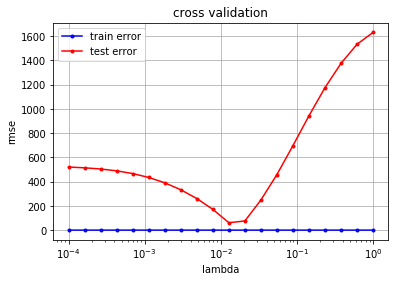

In [11]:
ridge_regression_demo(y_clean, x_clean, degree=4, k_fold=4)

### Logistic regression

In [175]:
lr_demo(y_clean, x_clean, 4)

   gamma=0.000,loss=-192623.387
   accuracy=0.710


### Regularized logistic regression

In [ ]:
lrr_demo(y_clean, x_clean, 4)

### Outputing the predictions

In [45]:
DATA_TEST_PATH = '../../data/test.csv' 
OUTPUT_PATH = './submissions'
_, x_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [63]:
# cleaning the test input
x_test_subgroups_list, ids_list = subgrouping(x_test, ids_test, dict_)
x_test_subgroups = group(x_test_subgroups_list, ids_list, dict_)
x_test_sel_features_subgoups = select_non_nan_columns(x_test_subgroups)

tx_test = helpers.build_poly(x_test_sel_features_subgoups, 4)

# comptute the model parameters
w, loss = imp.ridge_regression(y_clean, helpers.build_poly(x_clean, 4), lambda_=0.013)

# predict and write predictions
y_pred = predict_labels(w, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)